In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("user_behavior_dataset.csv")

In [7]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [9]:
df = data.copy()

In [10]:
df.drop("User ID", inplace=True, axis=1)

In [11]:
df["Device Model"].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [12]:
df["Operating System"].value_counts()

Operating System
Android    554
iOS        146
Name: count, dtype: int64

In [13]:
df["Gender"].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

In [14]:
num_cols = [i for i in df.columns if df[i].dtype != "object"]
cat_cols = [i for i in df.columns if df[i].dtype == "object"]

In [15]:
num_cols

['App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'User Behavior Class']

In [16]:
cat_cols

['Device Model', 'Operating System', 'Gender']

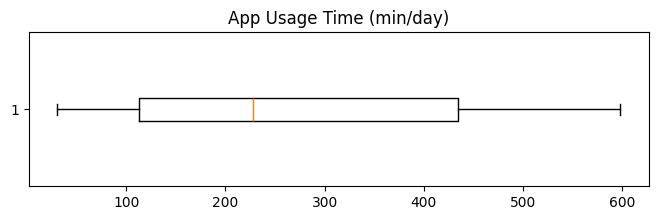

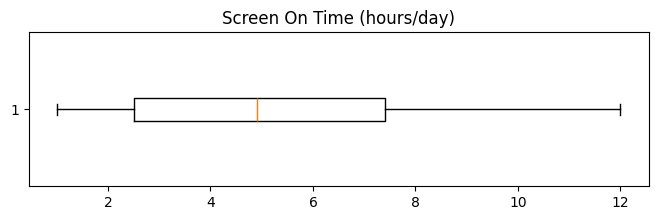

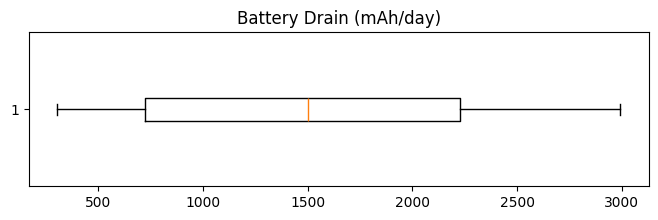

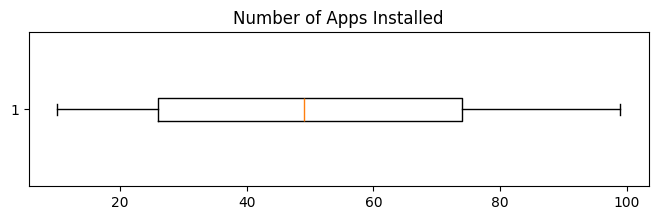

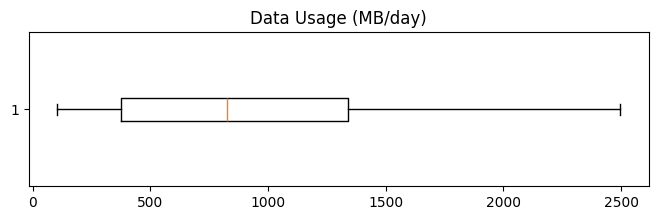

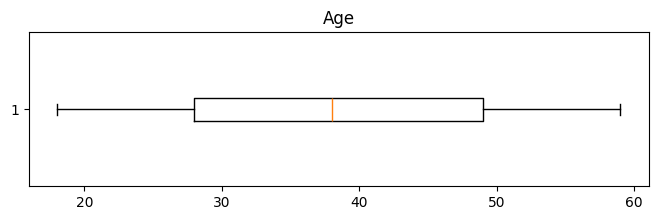

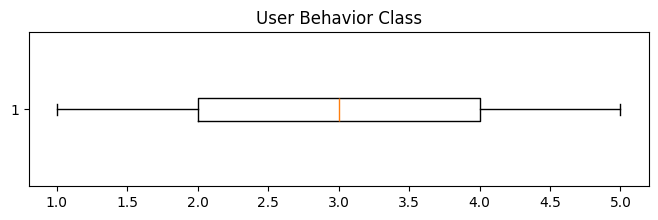

In [17]:
for i in num_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False)
    plt.title(i)
    plt.show()

In [19]:
ohe = OneHotEncoder(drop="first")

In [20]:
cat_to_num = ohe.fit_transform(df[cat_cols])

In [22]:
cat_to_num.toarray()

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]])

In [24]:
ohe.get_feature_names_out()

array(['Device Model_OnePlus 9', 'Device Model_Samsung Galaxy S21',
       'Device Model_Xiaomi Mi 11', 'Device Model_iPhone 12',
       'Operating System_iOS', 'Gender_Male'], dtype=object)

In [25]:
new_df = df.drop(cat_cols, axis=1)

In [26]:
new_df

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
0,393,6.4,1872,67,1122,40,4
1,268,4.7,1331,42,944,47,3
2,154,4.0,761,32,322,42,2
3,239,4.8,1676,56,871,20,3
4,187,4.3,1367,58,988,31,3
...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,2
696,316,6.8,1965,68,1201,59,4
697,99,3.1,942,22,457,50,2
698,62,1.7,431,13,224,44,1


In [28]:
encoded_df = pd.DataFrame(cat_to_num.toarray(), columns=ohe.get_feature_names_out())

In [29]:
encoded_df

,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...
695,0.0,0.0,0.0,1.0,1.0,1.0
696,0.0,0.0,1.0,0.0,0.0,1.0
697,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
new_df = pd.concat([new_df, encoded_df], axis=1)

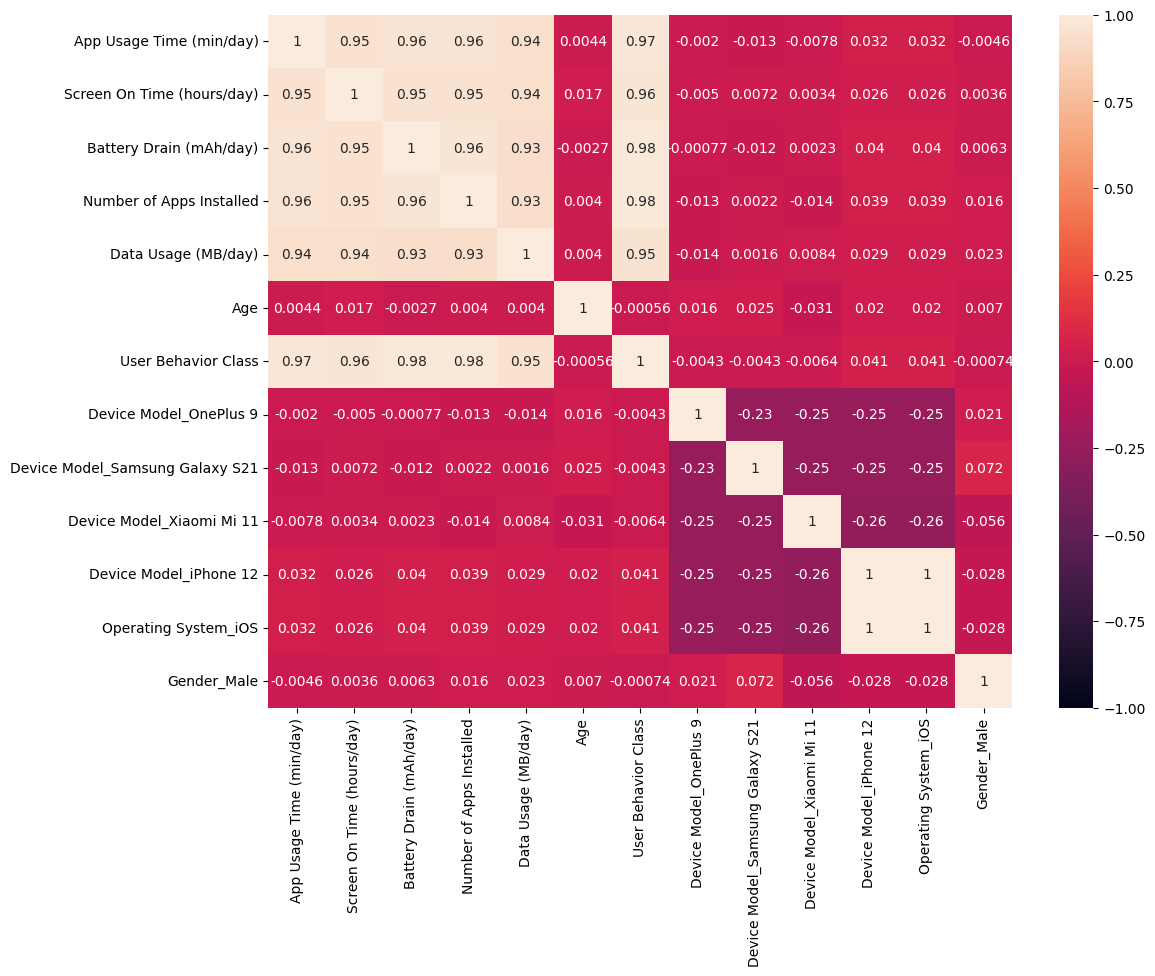

In [36]:
plt.figure(figsize=(12, 9))
sns.heatmap(new_df.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

In [37]:
new_df.corr()["User Behavior Class"]

App Usage Time (min/day)           0.970498
Screen On Time (hours/day)         0.964581
Battery Drain (mAh/day)            0.978587
Number of Apps Installed           0.981255
Data Usage (MB/day)                0.946734
Age                               -0.000563
User Behavior Class                1.000000
Device Model_OnePlus 9            -0.004342
Device Model_Samsung Galaxy S21   -0.004342
Device Model_Xiaomi Mi 11         -0.006377
Device Model_iPhone 12             0.041326
Operating System_iOS               0.041326
Gender_Male                       -0.000735
Name: User Behavior Class, dtype: float64

In [39]:
scaler = StandardScaler()

In [40]:
num_cols

['App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'User Behavior Class']

In [41]:
num_cols[:-1]

['App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age']

In [42]:
new_df[num_cols[:-1]] = scaler.fit_transform(new_df[num_cols[:-1]])

In [43]:
new_df

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,4,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,3,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,2,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,3,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,3,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-1.011609,-0.447664,-0.541394,-0.916705,-0.857419,-1.373076,2,0.0,0.0,0.0,1.0,1.0,1.0
696,0.253407,0.498073,0.537341,0.643237,0.423843,1.709145,4,0.0,0.0,1.0,0.0,0.0,1.0
697,-0.972078,-0.708557,-0.712428,-1.065271,-0.738668,0.959416,2,0.0,0.0,0.0,0.0,0.0,0.0
698,-1.181031,-1.165120,-1.336702,-1.399544,-1.102733,0.459596,1,0.0,1.0,0.0,0.0,0.0,1.0


In [46]:
X = new_df.drop("User Behavior Class", axis=1)
y = new_df["User Behavior Class"]

In [47]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=23, train_size=0.75)

In [50]:
X_tr.shape

(525, 12)

In [51]:
model = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)

In [52]:
model.fit(X_tr, y_tr)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [53]:
model.score(X_tr, y_tr)

0.9980952380952381

In [54]:
y_pr = model.predict(X_te)

In [55]:
accuracy_score(y_te, y_pr)

0.9942857142857143

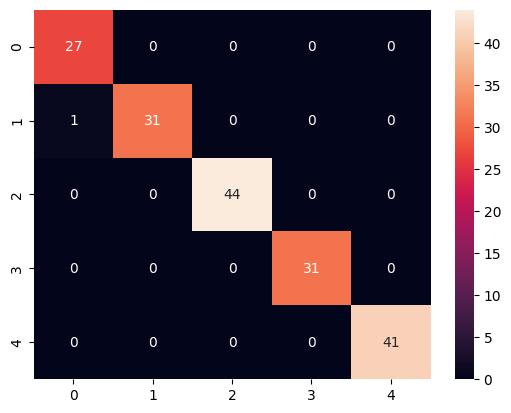

In [57]:
sns.heatmap(confusion_matrix(y_te, y_pr), annot=True)
plt.show()

In [58]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        27
           2       1.00      0.97      0.98        32
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        41

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175



In [59]:
kf = KFold(10)

In [60]:
cvs = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=11), X=X_tr, y=y_tr, cv=kf, verbose=True, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


In [61]:
cvs

array([0.98113208, 0.98113208, 0.98113208, 1.        , 0.96226415,
       0.96153846, 1.        , 0.98076923, 0.96153846, 1.        ])

In [62]:
cvs.mean()

0.9809506531204646

In [63]:
gscv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={"n_neighbors":[3, 5, 7, 9, 11, 13, 15]})

In [64]:
gscv.fit(X_tr, y_tr)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]})

In [65]:
gscv.best_params_

{'n_neighbors': 7}

In [67]:
model2 = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
model2.fit(X_tr, y_tr)
model2.score(X_tr, y_tr)
y_pr = model2.predict(X_te)
accuracy_score(y_te, y_pr)

0.9942857142857143